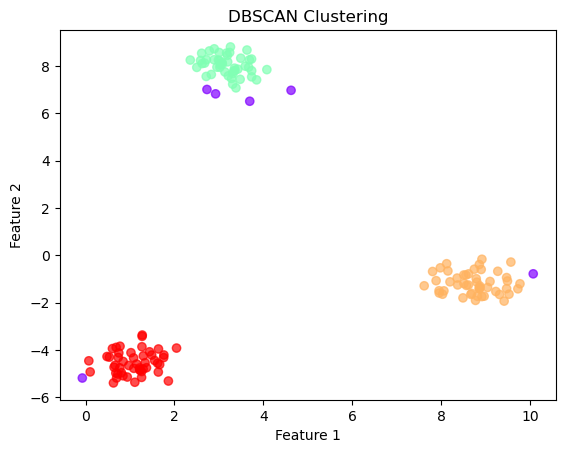

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib import pyplot as plt

# Generate synthetic data with three cluster centers and 150 samples
data, _ = make_blobs(n_samples=150, centers=3, n_features=2, cluster_std=0.50)

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Define the region query function to return indices
def region_query(D, P, eps):
    neighbors = []
    for idx, point in enumerate(D):
        if calculate_distance(point, P) < eps:
            neighbors.append(idx)
    return neighbors

# Define the function to grow a cluster
def grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts):
    labels[P_idx] = C
    i = 0
    while i < len(NeighborPts_idx):
        point_idx = NeighborPts_idx[i]
        if labels[point_idx] == 0:
            labels[point_idx] = C
            PnNeighborPts_indices = region_query(D, D[point_idx], eps)
            if len(PnNeighborPts_indices) >= MinPts:
                NeighborPts_idx += [idx for idx in PnNeighborPts_indices if labels[idx] == 0]
        i += 1

# Implementing the DBSCAN algorithm
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Apply DBSCAN to the dataset
eps = 0.5
MinPts = 4
labels = DBSCAN(data, eps, MinPts)

# Visualizing the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

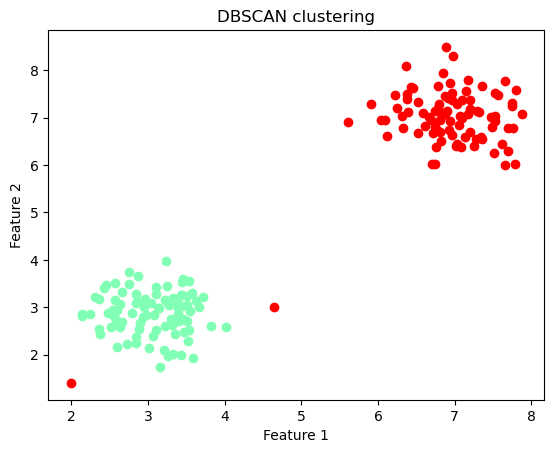

In [2]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Define the distance function
def calculate_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Region Query to find neighbors within eps
def region_query(D, P, eps):
    neighbors = []
    for i in range(D.shape[0]):
        if calculate_distance(D[i], P) < eps:
            neighbors.append(i)
    return neighbors

# Grow cluster by checking eps neighbors and including those that meet MinPts condition
def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
    # TODO: Add code that labels the point P as part of cluster C.
    labels[P] = C
    i = 0
    while i < len(NeighborPts):
        Pn = NeighborPts[i]
        if labels[Pn] == 0 or labels[Pn] == -1:
            labels[Pn] = C
            PnNeighborPts = region_query(D, D[Pn], eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts += [p for p in PnNeighborPts if labels[p] == 0]
        i += 1

# Implementing DBSCAN
def DBSCAN(D, eps, MinPts):
    labels = [0]*len(D)
    C = 0
    for P_idx in range(len(D)):
        if labels[P_idx] != 0:
            continue
        NeighborPts_idx = region_query(D, D[P_idx], eps)
        if len(NeighborPts_idx) < MinPts:
            labels[P_idx] = -1
        else:
            C += 1
            grow_cluster(D, labels, P_idx, NeighborPts_idx, C, eps, MinPts)
    return labels

# Generate synthetic data 
data, _ = make_blobs(n_samples=180, centers=[(3, 3), (7, 7)], n_features=2, cluster_std=0.5)

# Apply DBSCAN
labels = DBSCAN(D=data, eps=0.5, MinPts=5)

# Plot results
colors = plt.cm.rainbow(np.linspace(0, 1, len(np.unique(labels))))

for point, cluster_id in zip(data, labels):
    plt.plot(point[0], point[1], 'o', color=colors[int(cluster_id % len(colors))])

plt.title('DBSCAN clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()